## Jack Allan
### Professor Namini
### BUS 212
### May 16, 2021

### Final Project

## The Purpose / Why I Care

After graduation, I am moving into a sales analytics position with Red Bull. I have been searching for any sort of sales or distribution type data, so I can get some familiarity working with the types of variables I might encounter in my job. Unfortunately, a lot of sales data is proprietary information, so I have not found much data that looks very workable. However, this distribution data peaked my interest and I want to see how the machine learning models we have studied in class work with the data.

## The Data

Data Source: https://www.kaggle.com/prachi13/customer-analytics

This E-Commerce Shipping data comes from an international electronics e-commerce company that wants to mine key insights from their customer database, so they posted it on Kaggle.

## The Mission

For the purposes of this final project, I will use this data set and try to address a classification problem of predicting if the product arrived on time or not. I think this is a real-life problem I will have to address in my role after graduating, so the more practice and general understanding I gain from this project, the better.

### Importing Packages

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Importing Data

In [67]:
df = pd.read_csv('Train.csv')

## Data Cleaning

In [68]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [69]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

No Nulls is always a good sign, overall this dataset looks very clean

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Although, I will need to change the datatype of warehouse_block, mode_of_shipment, product_importance, and gender

### Converting datatypes

In [71]:
# Converting Warehouse_block to integer
types_encoded, types =df['Warehouse_block'].factorize()
df['Warehouse_block'] = types_encoded

# Converting Mode_of_Shipment to integer
types_encoded, types =df['Mode_of_Shipment'].factorize()
df['Mode_of_Shipment'] = types_encoded

# Converting Product_importance to integer
types_encoded, types =df['Product_importance'].factorize()
df['Product_importance'] = types_encoded

# Converting Gender to integer
types_encoded, types =df['Gender'].factorize()
df['Gender'] = types_encoded

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int64
 2   Mode_of_Shipment     10999 non-null  int64
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int64
 8   Gender               10999 non-null  int64
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(12)
memory usage: 1.0 MB


Now everything is an integer

### Renaming Target Variable

In [73]:
df.rename(columns = {'Reached.on.Time_Y.N':'On_time'}, inplace = True)

In [74]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_time
0,1,0,0,4,2,177,3,0,0,44,1233,1
1,2,1,0,4,5,216,2,0,1,59,3088,1
2,3,2,0,2,2,183,4,0,1,48,3374,1
3,4,3,0,3,3,176,4,1,1,10,1177,1
4,5,4,0,2,2,184,3,1,0,46,2484,1


And we can see an updated view of the data now

## Exploratory Data Analysis

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Warehouse_block,10999.0,1.833167,1.343823,0.0,1.0,1.0,3.0,4.0
Mode_of_Shipment,10999.0,0.998454,0.567099,0.0,1.0,1.0,1.0,2.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Product_importance,10999.0,0.604600,0.641464,0.0,0.0,1.0,1.0,2.0
Gender,10999.0,0.495863,0.500006,0.0,0.0,0.0,1.0,1.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0


### ID
ID Number of Customers.

In [76]:
df['ID'].head()

0    1
1    2
2    3
3    4
4    5
Name: ID, dtype: int64

In [77]:
df['ID'].max()

10999

In [78]:
df['ID'].value_counts().max()

1

ID's don't repeat, so I don't think I will include this in my models.

### Warehouse_block
The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

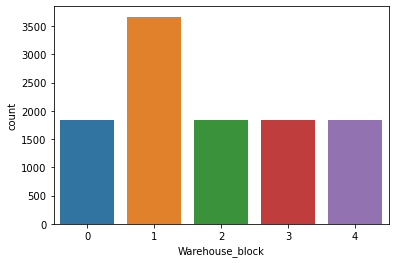

In [79]:
sns.countplot(df['Warehouse_block'])

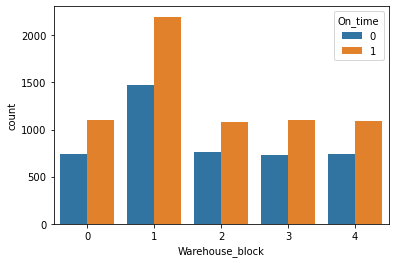

In [80]:
sns.countplot(df['Warehouse_block'], hue=df['On_time'])

Nothing out of the ordinary here, looks like the warehouse block is not a huge deciding factor in which packages are late.

### Mode_of_Shipment
The Company Ships the products in multiple way such as Ship, Flight and Road.

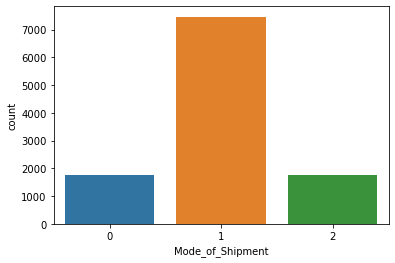

In [81]:
sns.countplot(df['Mode_of_Shipment'])

Makes logical sense that most of the shipments go through flights, but wouldn't they also rely on road as well? Unless that is out of the scope of the companies responsibilities. In that case, an on time shipment must mean on time to the final delivery partner, or at least that is what I am assuming

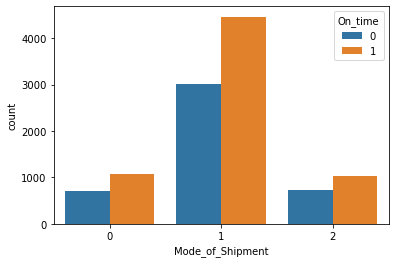

In [82]:
sns.countplot(df['Mode_of_Shipment'], hue=df['On_time'])

Nothing out of the ordinary here, looks like the mode of shipment is not a huge deciding factor in which packages are late.

### Customer_care_calls
The number of calls made from enquiry for enquiry of the shipment.

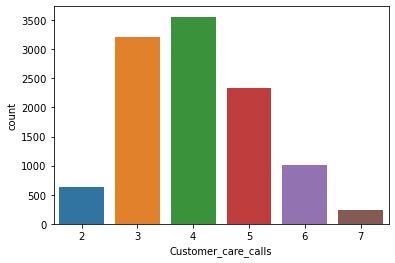

In [83]:
sns.countplot(df['Customer_care_calls'])

That's a lot more calls than I was expecting, I wonder if these calls happen after a package is already late?

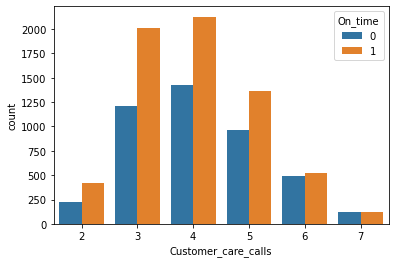

In [84]:
sns.countplot(df['Customer_care_calls'], hue=df['On_time'])

Once again, the number of customer care calls don't indicate anything super special in terms of figuring out which packages will be late or not.

### Customer_rating
The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

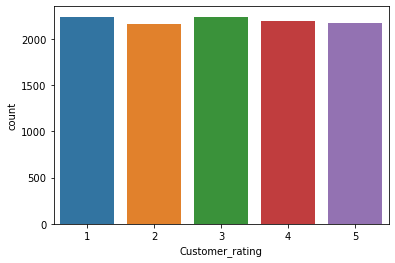

In [85]:
sns.countplot(df['Customer_rating'])

Very even distribution here

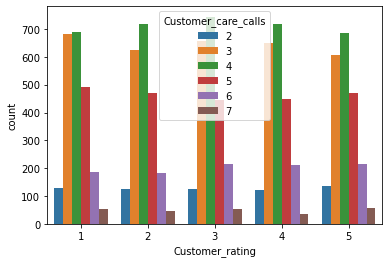

In [86]:
sns.countplot(df['Customer_rating'], hue=df['Customer_care_calls'])

Very similar distribution of customer care calls for customer rating, I wonder what metric decides a customer rating if it's not customer care calls.

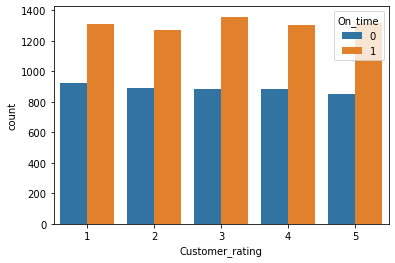

In [87]:
sns.countplot(df['Customer_rating'], hue=df['On_time'])

Once again, it doesn't appear much predictive power will come from the customer rating variable.

### Cost_of_the_Product
Cost of the Product in US Dollars.

In [88]:
df['Cost_of_the_Product'].head()

0    177
1    216
2    183
3    176
4    184
Name: Cost_of_the_Product, dtype: int64

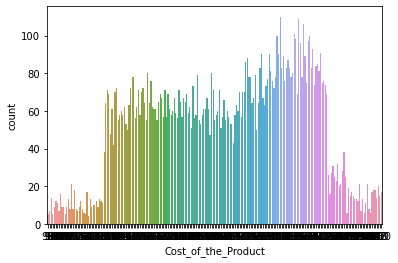

In [89]:
sns.countplot(df['Cost_of_the_Product'])

In [90]:
df['Cost_of_the_Product'].min()

96

In [91]:
df["Cost_of_the_Product"].max()

310

In [92]:
df["Cost_of_the_Product"].mean()

210.19683607600692

In [93]:
df["Cost_of_the_Product"].groupby(df["On_time"]).mean()

On_time
0    214.498647
1    207.289197
Name: Cost_of_the_Product, dtype: float64

Not a big difference between the mean cost of product that is late or not

### Prior_purchases
The Number of Prior Purchase.

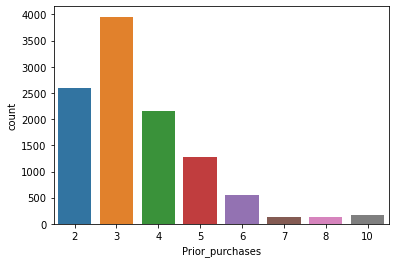

In [94]:
sns.countplot(df['Prior_purchases'])

Not too many returning customers...

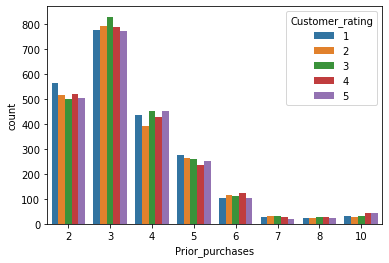

In [95]:
sns.countplot(df['Prior_purchases'], hue=df['Customer_rating'])

Once again, this variable does not seem to determine what rating a customer got

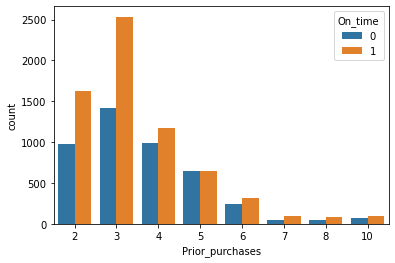

In [96]:
sns.countplot(df['Prior_purchases'], hue=df['On_time'])

And the number of prior purchases does not seem to make much of a difference in terms of if a product was on time or not

### Product_importance
The company has categorized the product in the various parameter such as low, medium, high.

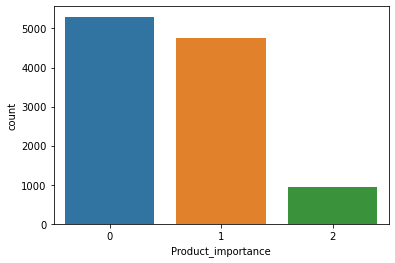

In [97]:
sns.countplot(df['Product_importance'])

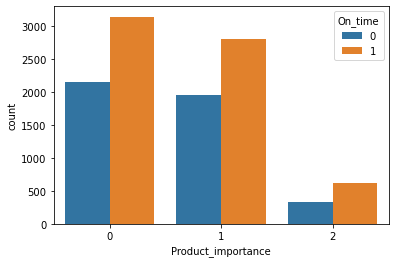

In [98]:
sns.countplot(df['Product_importance'], hue=df['On_time'])

Very surprised there is not a big difference. Why is this company ranking product importance if it doesn't even help determine if a product is late or not?

### Gender
Male and Female.

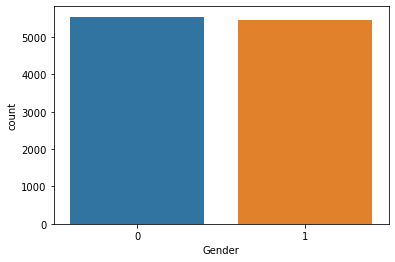

In [99]:
sns.countplot(df['Gender'])

I'm pretty shocked how even these are

### Discount_offered
Discount offered on that specific product.

In [100]:
df['Discount_offered'].head()

0    44
1    59
2    48
3    10
4    46
Name: Discount_offered, dtype: int64

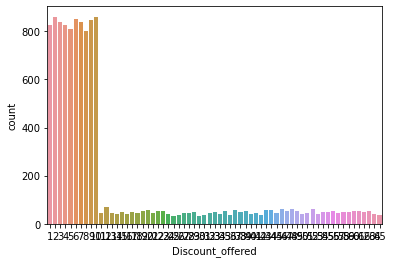

In [101]:
sns.countplot(df['Discount_offered'])

Most discounts offered are on the smaller end, makes sense.

### Weight_in_gms
It is the weight in grams.

In [102]:
df['Weight_in_gms'].head()

0    1233
1    3088
2    3374
3    1177
4    2484
Name: Weight_in_gms, dtype: int64

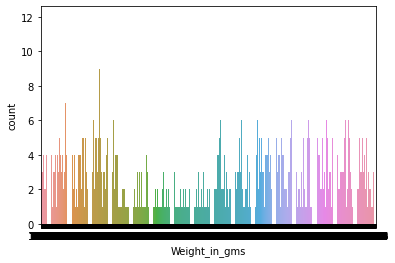

In [103]:
sns.countplot(df['Weight_in_gms'])

In [104]:
df['Weight_in_gms'].min()

1001

In [105]:
df['Weight_in_gms'].max()

7846

In [106]:
df['Weight_in_gms'].mean()

3634.016728793527

In [107]:
df['Weight_in_gms'].groupby(df["On_time"]).mean()

On_time
0    4168.668395
1    3272.640104
Name: Weight_in_gms, dtype: float64

Why is it that the average weight of products that are late is much less than products that are on time? If anything, I thought it would have been the other way around...

### On_time
It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

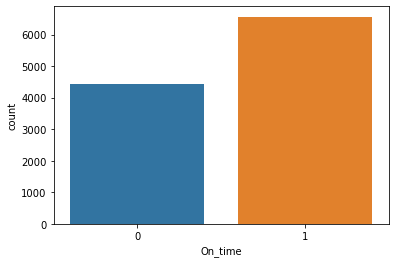

In [108]:
sns.countplot(df['On_time'])

Clearly we have a problem with products reaching on time. This is probably the reason this company has posted this dataset on Kaggle, there is a need to solve this problem!

## Models

In [109]:
# This is Prof. LeBaron's monte-carlo test/train function
# Generate many test/train splits
# A monte-carlo for cross validation
# This is how we should measure performance
# Note:  This will work with any model
def MCtraintest(nmc,X,y,modelObj,testFrac):
    # Create memory space for monte-carlo runs
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        trainScore[i] = modelObj.score(X_train,y_train)
        testScore[i]  = modelObj.score(X_test,y_test)
    return trainScore,testScore

In [110]:
X = df[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']]
y = df['On_time']

### Naive Bayes

In [111]:
# Initilizing the naive bayes model
nb = MultinomialNB()

trainS, testS = MCtraintest(100, X, y, nb, 0.5)
print('\nTrain Set Accuracy:')
print(np.mean(trainS))
print('\nTest Set Accuracy')
print(np.mean(testS))


Train Set Accuracy:
0.6618803418803418

Test Set Accuracy
0.6603418181818183


Good to have a naive predictor that can is right about 2/3 of the time.

### Linear Regression

In [112]:
# Initilizing the lin reg model
lr = LinearRegression()

trainS, testS = MCtraintest(100, X, y, lr, 0.5)
print('\nTrain Set Accuracy:')
print(np.mean(trainS))
print('\nTest Set Accuracy')
print(np.mean(testS))


Train Set Accuracy:
0.18312523039771594

Test Set Accuracy
0.179866144373206


Clearly linear regression is unable to pick up on this relationship.

### Logistic Regression

In [113]:
# Initilizing the log reg model
logr = LogisticRegression(max_iter = 500)

trainS, testS = MCtraintest(100, X, y, logr, 0.5)
print('\nTrain Set Accuracy:')
print(np.mean(trainS))
print('\nTest Set Accuracy')
print(np.mean(testS))


Train Set Accuracy:
0.6370103655210038

Test Set Accuracy
0.6335618181818181


Similar results to the naive predictor. With these results, I am not very confident going into the more complex models.

### Logistic Regression w/ Regularization

In [114]:
# Initilizing the lin reg model
logr = LogisticRegression(penalty = 'l2',max_iter = 500)

trainS, testS = MCtraintest(100, X, y, logr, 0.5)
print('\nTrain Set Accuracy:')
print(np.mean(trainS))
print('\nTest Set Accuracy')
print(np.mean(testS))


Train Set Accuracy:
0.6363266048372431

Test Set Accuracy
0.6342436363636363


Very similar to the model without a regularization penalty

### More Complex Models

NB: 0.660949 (0.239189)
KNN: 0.638408 (0.167412)
CART: 0.633408 (0.155497)
RF: 0.630039 (0.198825)
NLSV: 0.596691 (0.000413)


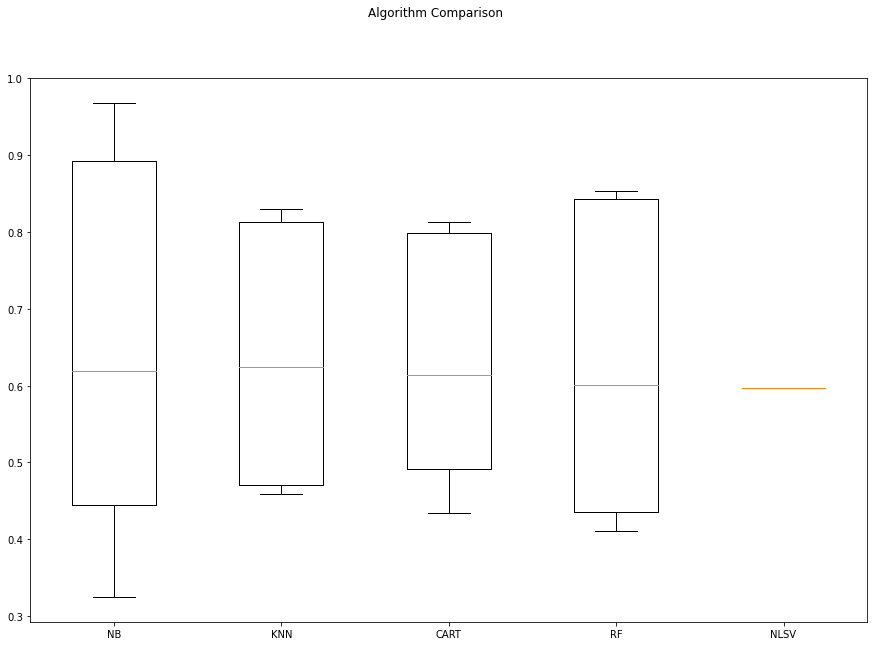

In [115]:
# Models to use
models = []
models.append(('NB', MultinomialNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NLSV', SVC(kernel='rbf',C=1.,gamma=1.0)))

# evaluate each model in turn
results = []
names = []

# Go through and try each model
for name, model in models:
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The mean of the results are all pretty similar. Naive Bayes barely beats out KNN, decision trees, and random forest. I am a bit curious about these results and I want to push the KNN, deicision trees and random forest a bit further with grid searches to see if we can improve on the scores.

## Hyperparameter Tuning

### Mini KNN grid search

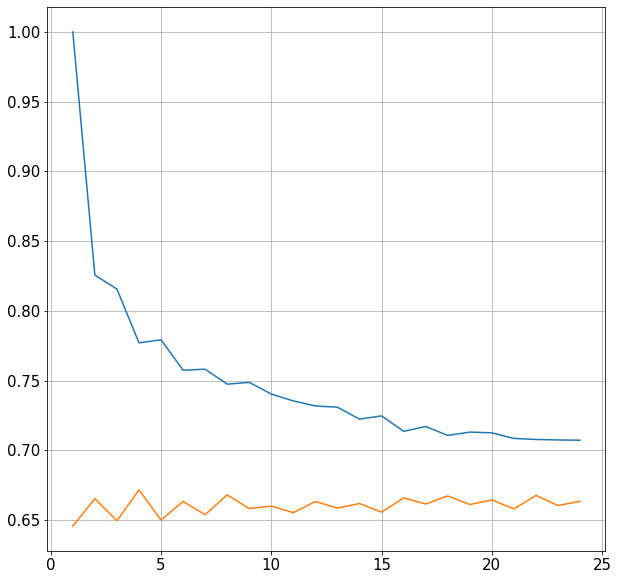

In [116]:
# Set up nearest neighbor fits for varying [1,nrange] neighbors
# plot train and test scores (R-squared)
nrange = 25
trainScore = []
testScore  = []
neighborList = []
# Generate some clean data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

for neighbors in range(1,nrange):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train,y_train)
    trainScore.append(knn.score(X_train,y_train))
    testScore.append(knn.score(X_test,y_test))
    neighborList.append(neighbors)

width = 10
height = 10
plt.figure(figsize=(width, height))
plt.rcParams.update({'font.size':15})
plt.plot(neighborList,trainScore)
plt.plot(neighborList,testScore)
plt.grid()

Clearly the test data can't keep up with the accuracy of the training data.

### Decision Tree Grid Search

In [117]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=4)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=4)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

Tree = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 14}


### Decision Tree with Tuned Hyperparameters Monte-Carlo Experiment

In [118]:
# Initilizing the decision tree regressor model
tree = DecisionTreeClassifier(max_depth = 5, min_impurity_decrease = 0.001, min_samples_split = 14)

trainS, testS = MCtraintest(500, X, y, tree, 0.25)
print('\nTrain Set Accuracy:')
print(np.mean(trainS))
print('\nTest Set Accuracy')
print(np.mean(testS))


Train Set Accuracy:
0.6874239301733543

Test Set Accuracy
0.6840472727272728


Very small improvement

### Random Forest Grid Search

In [119]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=4)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=4)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.668121476632115
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 100}


### Random Forest with Tuned Hyperparameters Monte-Carlo Experiment

In [120]:
# Initilizing the Random Forest Classifier
rf = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 16, n_estimators = 100)

trainS, testS = MCtraintest(500, X, y, rf, 0.25)
print('\nTrain Set Accuracy:')
print(np.mean(trainS))
print('\nTest Set Accuracy')
print(np.mean(testS))


Train Set Accuracy:
0.9492168747726997

Test Set Accuracy
0.6655658181818181


So we see a slight improvement after tuning the hyperparameters, but once again it is unable to pick up on a strong relationship to predict the classifications.

## Lessons Learned

In working with this data, exploring the variables, and reflecting over the past couple days I have learned a couple lessons. 

First, I think the variables included in this dataset did not lend themselves very useful for predicting whether or not a product will be on time or not. I will touch more on the predicting on time or not, but in terms of the data included in this dataset, it is mostly about customer analytics. It now seems clear to me that predicting whether a product will be on time or not is not a problem that needs customer data. I think data about geographic location, date/time data, or even weather data would be extremely helpful here. Anything to help us try to find more variables that are relevant when we are talking about shipping a product from A to B. So what does this teach me? Well it forces me to start thinking about what types of data are appropriate for certain problems. Just because we have a certain type of data does not mean it is the right data to help us solve the problem. I am sure this will be something I deal with a lot in the future, I will be faced with many variables and I will need to select the right ones.

Second, when it comes to predicting whether a product will arrive on time or not, how much of that is predictable. Are we facing the same issues over and over again? Can we track that in some sort of variable. I think there is a lot of domain knowledge that would be very useful here. There is a definite need to talk to various people in the 'field' to try and better understand the problem here. 

Lastly, I really need to focus some more time on understanding data reduction techniques or prinicipal components analysis. Basically understanding how to find the most important variables for one of my models. As I mentioned in the first part of this, I think I will be faced with lots of data as I enter the real world, so how can I figure out what the best/most important variables are. Doing this final project made me realize I need to work on that now, I shouldn't wait until later I should do it now, so I will work on that on my own.

Overall, I think this final project got me thinking about possibilities for working with data, but also how I will likely deal with problems in the real world. I'm really excited to begin working on these sorts of problems with a team, or at least with seasoned colleagues who can help answer my questions along the way.